<a href="https://colab.research.google.com/github/Priyabrat845/Airbnb-Booking-Analysis/blob/main/Copy_of_Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  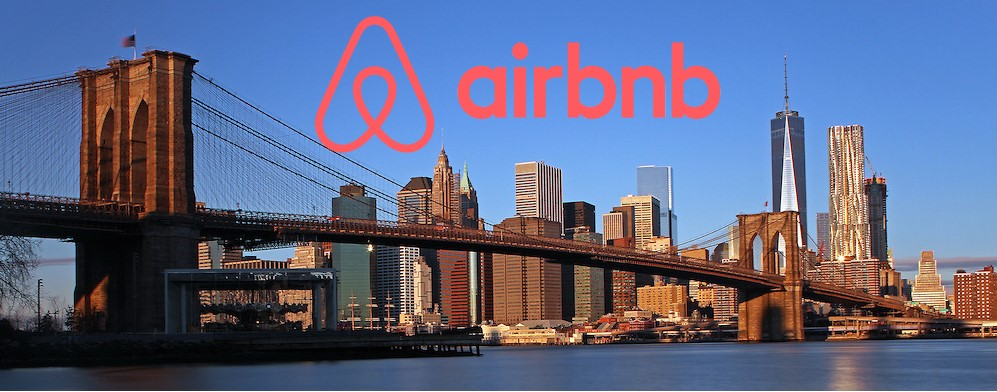

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [75]:
pip install geopandas

     |████████████████████████████████| 1.0MB 4.0MB/s 
     |████████████████████████████████| 6.5MB 34.8MB/s 
     |████████████████████████████████| 15.3MB 230kB/s 
     |████████████████████████████████| 92kB 9.4MB/s 
  Found existing installation: click 8.0.0
    Uninstalling click-8.0.0:
      Successfully uninstalled click-8.0.0


In [78]:
pip install geoplot


     |████████████████████████████████| 12.1MB 7.9MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 225kB 43.2MB/s 
     |████████████████████████████████| 19.1MB 247kB/s 
  Created wheel for cartopy: filename=Cartopy-0.19.0.post1-cp37-cp37m-linux_x86_64.whl size=12516143 sha256=2160f3e634795b215937801cfcda4f3a3ac5f0468b3d758d873b43dab869b8d3
  Stored in directory: /root/.cache/pip/wheels/45/7f/3b/37879587817fd1bbbee7b47312e2401b4f542cccf2fbe9b4ee
Successfully built cartopy
  Created wheel for pyshp: filename=pyshp-2.1.3-cp37-none-any.whl size=37264 sha256=3f919787085396187639c30e2aef90faf0be45f5c8a72b635a7a71498c5b082f
  Stored in directory: /root/.cache/pip/wheels/76/2b/d4/53e6b9a0fb0a9f9f29664cf82605af8bc81d5ab44d987896dd
Successfully built pyshp


In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
from itertools import cycle, islice
from shapely.geometry import polygon,point
from plotnine import *
from shapely.geometry import Point 
import geopandas as gpd
import geoplot
from matplotlib.pyplot import figure
import warnings
warnings.filterwarnings('ignore')

## **Reading and importing Data**

In [ ]:
#import data from csv file
path = "https://raw.githubusercontent.com/gyana-ranjan-dash/airbnb_2018/main/Copy%20of%20Airbnb%20NYC%202019.csv"
airbnb_df = pd.read_csv(path)
airbnb_df.head(3)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365


Each column in the dataframe gives us information about the properties like:













*   The name of the properties set by different hosts.
*   host_id and host_name are identification ids of the host for Airbnb


*   There are five groups in neighbourhood_group, shown above

*   The neighbourhood tells us which specific neighbourhood in the group the property belongs to

*   latitude and longitude give us the coordinates of the location. We can use this with folium to map all the locations
*   price will be the attribute we will try to predict


*   minimum_nights are the minimum number of nights the property has to be booked for


*   number_of_reviews, last_review, and reviews_per_month give us information about the reviews of each property.


*   calculated_host_listings_count and availability_365 are additional features that tell us how many total properties the host has, and how long this property is available in a year






In [ ]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Few columns like last_review reviews_per_month contain high amount of null values and other columns seems fine.

In [ ]:
airbnb_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
#we found, there are lot of outliers in the data, for better visualization we have ignored the top 5% of data and consider prices which are below $400
print(airbnb_df['price'].describe(percentiles=[.25, .50, .75, .95]))

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
95%        355.000000
max      10000.000000
Name: price, dtype: float64


In [ ]:
airbnb['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

There are 5 unique different neighbourhood groups availabe in the data set.

In [ ]:
airbnb_df['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

There are above 3 unique different room types availabe in the data set.

## **Data Cleaning**

In [ ]:
#checking for any duplicate values in the dataset
airbnb_df.duplicated().sum()

0

there are no duplicate values in the dataset

In [ ]:
#Dropping the unnecessary columns from the dataset.
airbnb_df.drop(['id','name','last_review'],axis = 1, inplace = True)

In [ ]:
airbnb_df.shape

(48895, 13)

After dropping the 3 columns we left with 13 columns and 48895 rows to work on.

In [ ]:
# impute the null values as 0
airbnb_df['reviews_per_month'] = airbnb_df['reviews_per_month'].fillna(0)

In [ ]:
airbnb_df.isnull().mean()*100

host_id                           0.000000
host_name                         0.042949
neighbourhood_group               0.000000
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
reviews_per_month                 0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
dtype: float64

Afrer dropping the irrelevant columns and imputing 0 in place of NULL now we don't have any significant null values in our dataset.

In [ ]:
# Creating a new dataframe which will drop any rows which are outliers i.e price geater than $400 
adjusted_airbnb_df =airbnb_df[airbnb_df.price < 400]

## **EDA**

In [ ]:
airbnb_df['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [ ]:
#Finding the total number of rooms listed in each neighbourhood groups.
neighbourhood_group_df = pd.DataFrame(adjusted_airbnb_df['neighbourhood_group'].value_counts()).reset_index().rename(columns = {'index' : 'neighbourhood_group', 'neighbourhood_group':'Total_rooms_listed'})
neighbourhood_group_df

,neighbourhood_group,Total_rooms_listed
0,Manhattan,20209
1,Brooklyn,19653
2,Queens,5603
3,Bronx,1077
4,Staten Island,365


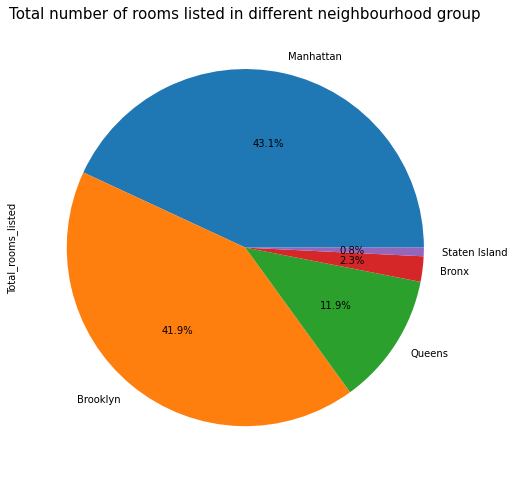

In [ ]:
neighbourhood_group_df.plot.pie(y = 'Total_rooms_listed', autopct='%1.1f%%',labels= neighbourhood_group_df['neighbourhood_group'] ,legend = False,figsize=(8, 10))
plt.title("Total number of rooms listed in different neighbourhood group",size=15)
plt.show()

**From the above pie chart e concluded that:**

a. Manhattan and brooklyn have most number of rooms, together have 85% of total rooms available

b. Manhattan has highest number of rooms which is more than 43%

In [32]:
#Stored the list of top 10 host in a separate dataframe top_10_host 
top_10_host = pd.DataFrame(adjusted_airbnb_df['host_id'].value_counts()).reset_index().rename(columns = {'index':"host_id", 'host_id':'Number of listed apt'}).head(10)
top_10_host

,host_id,Number of listed apt
0,219517861,284
1,107434423,220
2,30283594,113
3,137358866,103
4,12243051,96
5,16098958,93
6,61391963,91
7,22541573,87
8,200380610,54
9,7503643,52


Text(0.5, 1.0, 'Top 10 hosts')

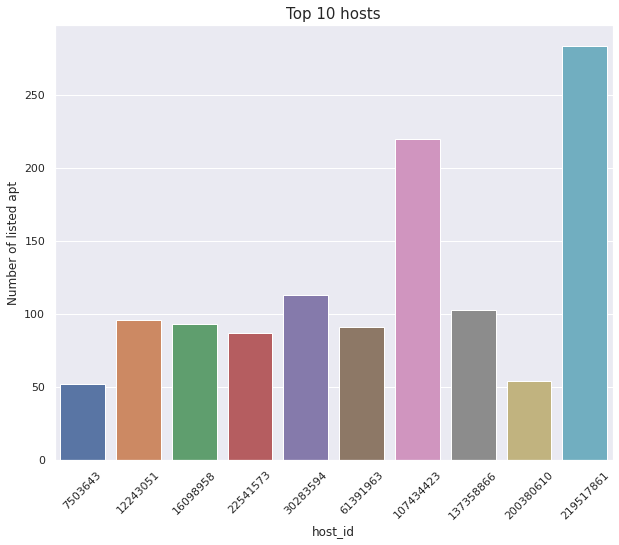

In [35]:
sns.set(rc={'figure.figsize':(10,8)})
plot1=sns.barplot(x='host_id',y='Number of listed apt',data=top_10_host)
plot1.set_xticklabels(plot1.get_xticklabels(), rotation=45)
plt.title('Top 10 hosts',size=15)

Above plot shows the top 10 hosts with maximum number of rooms listed on their name.

In [36]:
# calculating total number of rooms for different room types
room_type_df = pd.DataFrame(adjusted_airbnb_df['room_type'].value_counts()).reset_index().rename(columns = {"index":'room_type', 'room_type':'Total_listed_rooms'})
room_type_df

,room_type,Total_listed_rooms
0,Entire home/apt,23671
1,Private room,22093
2,Shared room,1143


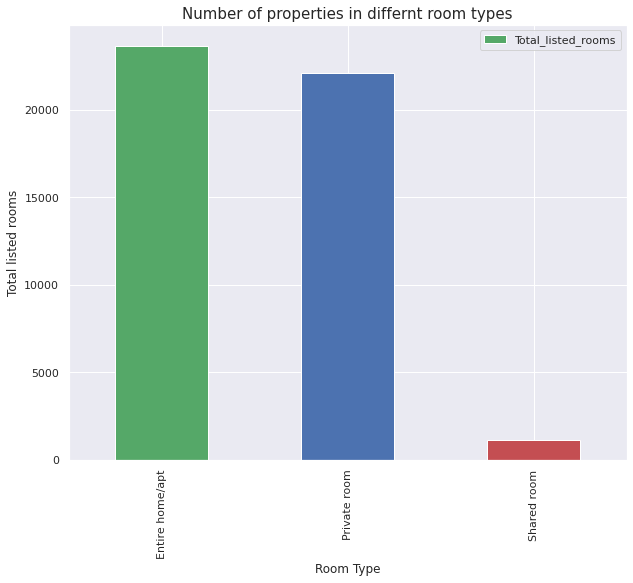

In [38]:
#plt.figure(figsize=(10, 5))
my_colors = list(islice(cycle(['g', 'b', 'r']), None, len(room_type_df)))
room_type_df.plot.bar(x = 'room_type', y = 'Total_listed_rooms', color=my_colors)

plt.xlabel("Room Type")
plt.ylabel("Total listed rooms")
plt.title("Number of properties in differnt room types",size=15)
plt.show()

From the above bar plot we can clearly see that Entire home/apt is highest in number where as the number of shared room is very less.

In [40]:
#Listing details of Manhattan 
Manhattan_df = adjusted_airbnb_df[adjusted_airbnb_df['neighbourhood_group'] == 'Manhattan' ]
Manhattan_df.head(3)

,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
1,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
4,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [41]:
# Manhattan top 10 hosts.
Manhattan_top_host = pd.DataFrame(Manhattan_df['host_id'].value_counts()).reset_index().rename(columns = {"index":"host_id","host_id":"Total_rooms"}).head(10)
Manhattan_top_host

,host_id,Total_rooms
0,219517861,284
1,107434423,218
2,30283594,113
3,12243051,96
4,16098958,93
5,61391963,91
6,22541573,86
7,200380610,54
8,1475015,52
9,120762452,50


In [42]:
# Listing details of Queens.
Queens_df = adjusted_airbnb_df[adjusted_airbnb_df['neighbourhood_group'] == 'Queens' ]
Queens_df.head(3)

,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
46,50124,Orestes,Queens,Long Island City,40.74771,-73.94740,Private room,130,3,248,2.25,1,215
77,70091,Justin,Queens,Woodside,40.75038,-73.90334,Private room,70,30,25,0.22,1,324
143,140025,Fredah,Queens,Flushing,40.74028,-73.83168,Private room,140,2,1,0.01,1,1


In [43]:
# Queens top 10 hosts.
Queens_top_host = pd.DataFrame(Queens_df['host_id'].value_counts()).reset_index().rename(columns = {"index":"host_id","host_id":"Total_rooms"}).head(10)
Queens_top_host

,host_id,Total_rooms
0,137358866,79
1,19303369,29
2,242962235,23
3,134184451,18
4,3250450,16
5,200239515,15
6,5962328,15
7,65809485,12
8,175730239,12
9,263053182,10


In [44]:
# Listing details of Staten Island.
Staten_Island_df = adjusted_airbnb_df[adjusted_airbnb_df['neighbourhood_group'] == 'Staten Island' ]
Staten_Island_df.head(3)

,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
169,185978,Newyorkroomwithaview,Staten Island,St. George,40.64524,-74.08088,Private room,70,2,166,1.66,1,312
249,303939,Lissette,Staten Island,Tompkinsville,40.63536,-74.08537,Private room,36,2,193,1.85,6,360
250,303939,Lissette,Staten Island,Tompkinsville,40.63627,-74.08543,Private room,37,2,147,1.44,6,0


In [45]:
#Staten Island top 10 hosts.
Staten_Island_top_host = pd.DataFrame(Staten_Island_df['host_id'].value_counts()).reset_index().rename(columns = {"index":"host_id","host_id":"Total_rooms"}).head(10)
Staten_Island_top_host

,host_id,Total_rooms
0,104812805,8
1,50756378,7
2,104927746,7
3,137999892,7
4,117492425,6
5,303939,6
6,99202586,5
7,92493393,5
8,128338539,4
9,43392243,4


In [46]:
# Listing details of Bronx.
Bronx_df = adjusted_airbnb_df[adjusted_airbnb_df['neighbourhood_group'] == 'Bronx' ]
Bronx_df.head(3)

,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
171,190409,Waundell,Bronx,Highbridge,40.83232,-73.93184,Private room,40,1,219,2.04,3,353
207,190409,Waundell,Bronx,Highbridge,40.83075,-73.93058,Private room,45,1,138,1.45,3,323
260,295128,Carol Gloria,Bronx,Clason Point,40.81309,-73.85514,Private room,90,2,0,0.00,7,349


In [47]:
#Bronx Island top 10 hosts.
Bronx_top_host = pd.DataFrame(Bronx_df['host_id'].value_counts()).reset_index().rename(columns = {"index":"host_id","host_id":"Total_rooms"}).head(10)
Bronx_top_host

,host_id,Total_rooms
0,310670,12
1,23878336,10
2,35783912,8
3,30509656,8
4,2988712,7
5,273354185,7
6,174785358,7
7,295128,7
8,32164030,6
9,152246149,5


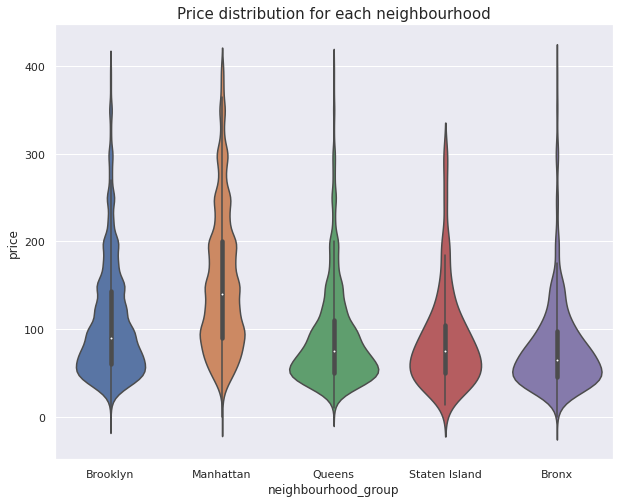

In [49]:
# using violinplot to showcase density and distribtuion of prices 
vio_plt = sns.violinplot(data=adjusted_airbnb_df, x='neighbourhood_group', y='price')
vio_plt.set_title('Price distribution for each neighbourhood',size=15)
plt.show()


In the above figure, we can clearly see that manhattan have more premium properites. Bronx , staten island and queens have resonable prices as compared to the manhattan and brooklyn.

In [50]:
avg_price_rooms = pd.DataFrame(adjusted_airbnb_df.groupby(['room_type'])['price'].mean())
avg_price_rooms

,price
room_type,
Entire home/apt,170.040302
Private room,80.273526
Shared room,60.562555


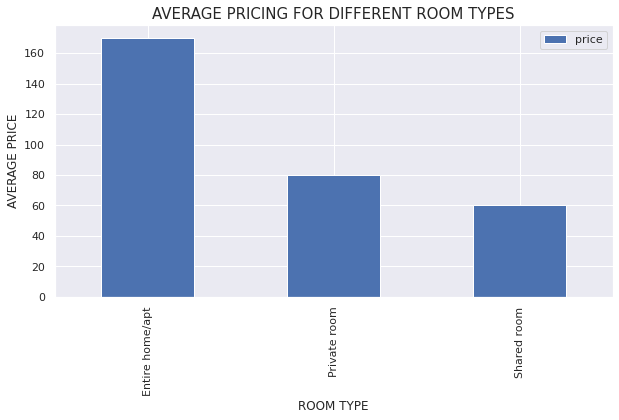

In [56]:
pd.DataFrame(adjusted_airbnb_df.groupby(['room_type'])['price'].mean()).plot.bar(color='b', figsize=(10,5))
plt.xlabel('ROOM TYPE')
plt.ylabel('AVERAGE PRICE')
plt.title('AVERAGE PRICING FOR DIFFERENT ROOM TYPES',size=15)
plt.show()

We can clearly see the average price for a Entire home/apt is much higher than any other room types whereas the average price for shared room is very low.

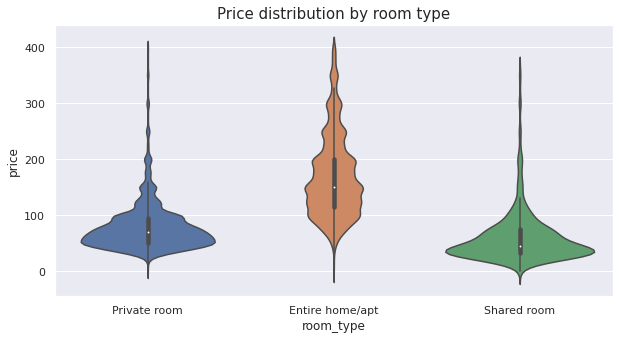

In [57]:
# using violinplot to showcase density and distribtuion of prices
plt.figure(figsize=(10,5))
vio_plt=sns.violinplot(data=adjusted_airbnb_df, x='room_type', y='price')
vio_plt.set_title('Price distribution by room type',size=15)
plt.show()

In [59]:
#Plotting the mean price for each neighbourhood group and room types 
ax2=adjusted_airbnb_df.groupby(['neighbourhood_group','room_type'])['price'].mean()
ax2

neighbourhood_group  room_type      
Bronx                Entire home/apt    117.040541
                     Private room        60.595679
                     Shared room         47.254237
Brooklyn             Entire home/apt    153.461983
                     Private room        70.654789
                     Shared room         48.036496
Manhattan            Entire home/apt    191.241776
                     Private room       100.657548
                     Shared room         78.848936
Queens               Entire home/apt    134.513659
                     Private room        66.452813
                     Shared room         46.989691
Staten Island        Entire home/apt    121.089286
                     Private room        62.292553
                     Shared room         57.444444
Name: price, dtype: float64

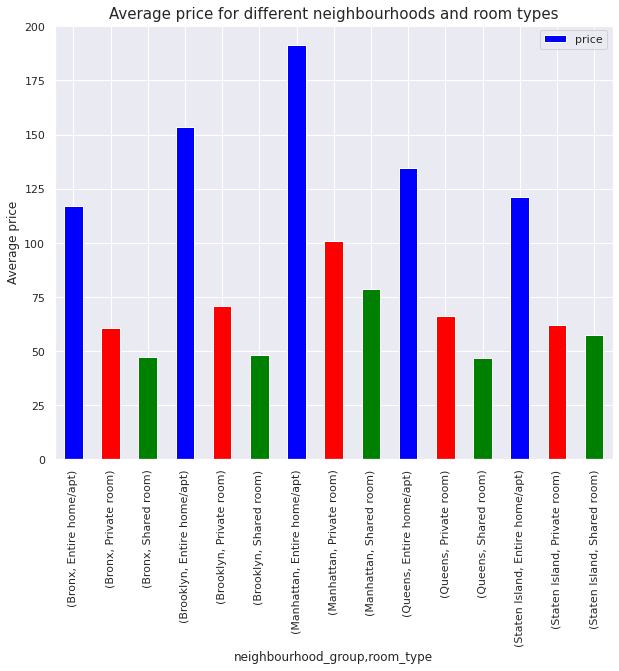

In [61]:
ax2.plot.bar(color=['blue','red','green'])
plt.title('Average price for different neighbourhoods and room types',size=15)
plt.ylabel('Average price')
plt.legend()

The average price of Entire room/apt, Private room and shared rooms in manhattan is higher than any other in neighbourhood

**From the above insights we can conclude that the manhattan is a expensive place to rent property in any category**

In [65]:
#Top 10 reviewed listings.
top_reviewed_listings=airbnb_df.nlargest(10,'number_of_reviews')
top_reviewed_listings

,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
11759,47621202,Dona,Queens,Jamaica,40.66730,-73.76831,Private room,47,1,629,14.58,2,333
2031,4734398,Jj,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,607,7.75,3,293
2030,4734398,Jj,Manhattan,Harlem,40.82124,-73.93838,Private room,49,1,597,7.72,3,342
2015,4734398,Jj,Manhattan,Harlem,40.82264,-73.94041,Private room,49,1,594,7.57,3,339
13495,47621202,Dona,Queens,Jamaica,40.66939,-73.76975,Private room,47,1,576,13.40,2,173
10623,37312959,Maya,Queens,East Elmhurst,40.77006,-73.87683,Private room,46,1,543,11.59,5,163
1879,2369681,Carol,Manhattan,Lower East Side,40.71921,-73.99116,Private room,99,2,540,6.95,1,179
20403,26432133,Danielle,Queens,East Elmhurst,40.76335,-73.87007,Private room,48,1,510,16.22,5,341
4870,12949460,Asa,Brooklyn,Park Slope,40.67926,-73.97711,Entire home/apt,160,1,488,8.14,1,269
471,792159,Wanda,Brooklyn,Bushwick,40.70283,-73.92131,Private room,60,3,480,6.70,1,0


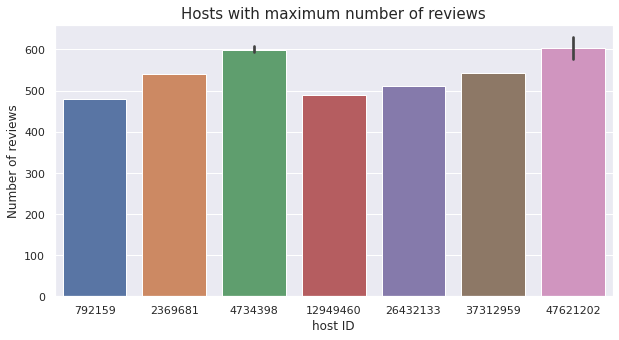

In [66]:
plt.figure(figsize=(10,5))
sns.barplot(x='host_id',y='number_of_reviews',data=top_reviewed_listings)
plt.xlabel("host ID")
plt.ylabel('Number of reviews')
plt.title("Hosts with maximum number of reviews",size=15)
plt.show()

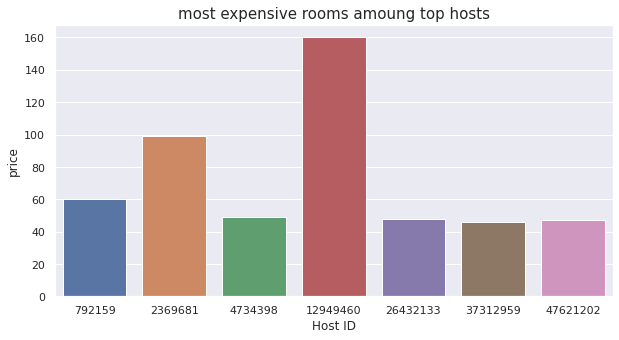

In [67]:
plt.figure(figsize=(10,5))
sns.barplot(x='host_id',y='price',data=top_reviewed_listings)
plt.xlabel("Host ID")
plt.ylabel("price")
plt.title("most expensive rooms amoung top hosts",size=15)
plt.show()

The host with host_id 12949460 is the list's most expensive room.

**From the above we concluded that, the listings having average price less are getting more reviews and been prefered by the customers more.**

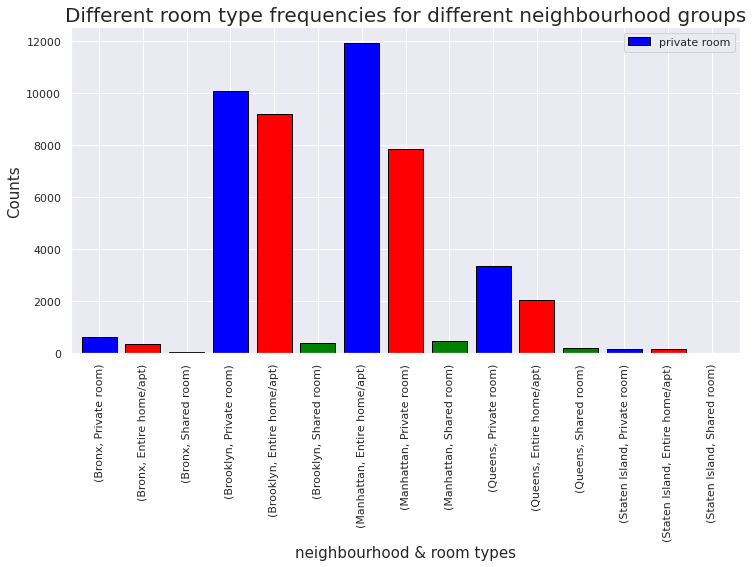

In [73]:
ax=adjusted_airbnb_df.groupby('neighbourhood_group')['room_type'].value_counts().plot.bar(figsize=(12,6),width=0.8,linewidth=1,edgecolor='black',color=['blue','red','green'])
ax.set_title("Different room type frequencies for different neighbourhood groups", fontsize = 20)
ax.set_xlabel("neighbourhood & room types", fontsize = 15)
ax.set_ylabel("Counts", fontsize = 15)
ax.legend(['private room','entire room','shared room'])

*In manhattan the number of listed Entire home/apt is much higher than any other room type

*In Brooklyn the number of listed Private room is slightly higher than Entire home/apt

*In Queens the total number of listed Private Rooms is much higher than the anyother room type.

*In Bronx and Staten island the number of rooms in all the category are almost same

In [80]:
boroughs = gpd.read_file(geoplot.datasets.get_path('nyc_boroughs'))
geo_df=gpd.GeoDataFrame(adjusted_airbnb_df,geometry=gpd.points_from_xy(adjusted_airbnb_df["longitude"], adjusted_airbnb_df["latitude"]))

No handles with labels found to put in legend.


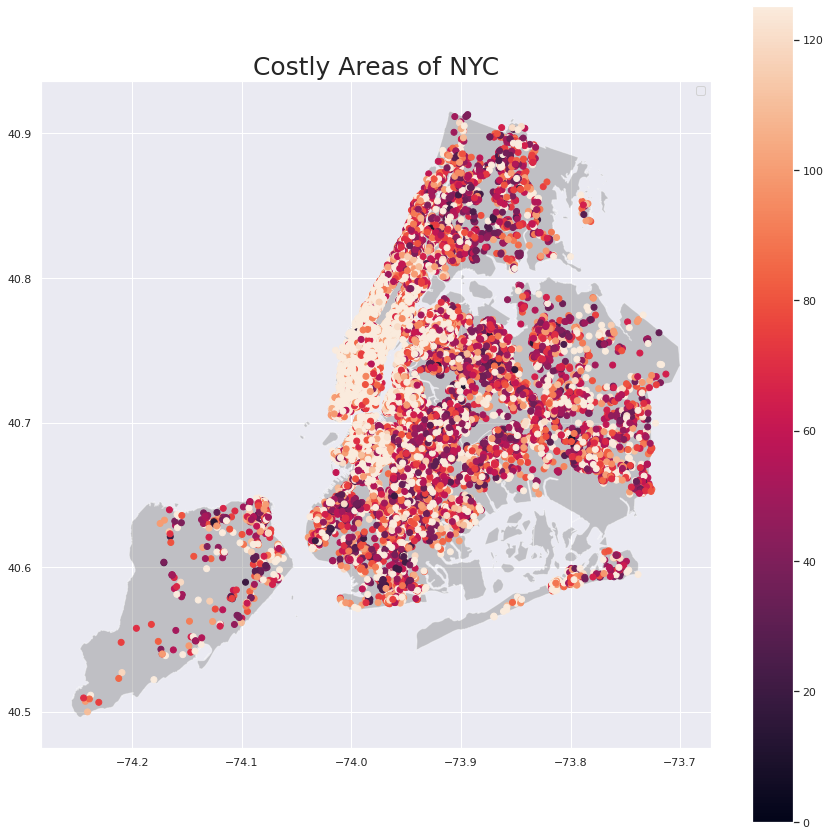

In [84]:
fig,ax=plt.subplots(figsize=(15,15))
boroughs.plot(ax=ax,alpha=0.4,color="grey")
x, y = geo_df['longitude'].values, geo_df['latitude'].values
plt.scatter(x,y,c=geo_df['price'])
plt.clim(0,np.mean(adjusted_airbnb_df['price']))
plt.title("Costly Areas of NYC",fontdict={'fontsize':25})
plt.colorbar()
plt.legend()



1.   Light pink dots represents the places where the properties are costly

2.   Deep blue dots reprensts the places where the properties are comparatively cheaper



No handles with labels found to put in legend.


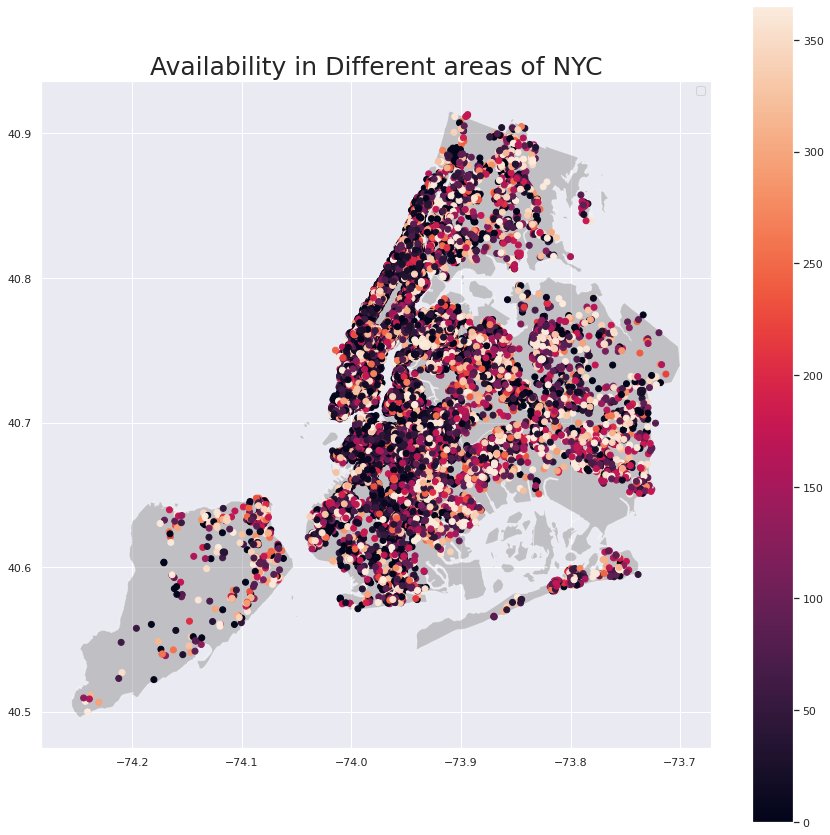

In [83]:
fig,ax=plt.subplots(figsize=(15,15))
boroughs.plot(ax=ax,alpha=0.4,color="grey")
x, y = geo_df['longitude'].values, geo_df['latitude'].values
plt.scatter(x,y,c=geo_df['availability_365'])
plt.clim(0,np.max(geo_df['availability_365']))
plt.title('Availability in Different areas of NYC',fontdict={'fontsize':25})
plt.colorbar()
plt.legend()

1.   From the above graph we can say people prefer to rent a room which have less minmum number of nights
2.   If we compare above two graphs we can conclude the region with most expensive rooms have less number of minumn nights to stay.


## **Conclusion**

**By this Airbnb booking data analysis, I have reached to the below conclusions:**



* **Manhattan** and **Brooklyn** are the most costly locations with highest number of listings.
* **Staten island** is the least popular place amoung them.
* In **Manhattan** people perfer to rent entire home and apartment.
* Most listings have price in the range 1-150.
* Majority of Hosts listed their entire home property.
* The listings which are expensive tend to attract less reviews, which means people less likely to rent expensive rooms
* People prefer to list there properties for minimun number of nights less than a week. 
* The listing having high availability are getting more reviews.
